## Sparse Matrices and Graphs

In [1]:
# importing modules

import scipy.sparse as sp
import scipy.sparse.linalg
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

### Scipy.coo_matrix:

for example:

$$A =  \begin{bmatrix}0 & 1 & 0 & 0 \\0 & 0& 0& 2 \\0 & 0 & 3 & 0 \\4 & 0 & 0 & 0 \end{bmatrix} $$

In [2]:
# Example_01

values = [1, 2, 3, 4]
rows = [0, 1, 2, 3]
cols = [1, 3, 2, 0]

A = sp.coo_matrix((values, (rows, cols)), shape=[4, 4])
A

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in COOrdinate format>

In [3]:
# Example_02

print(f"A.shape: {A.shape}")
print(f"A.size: {A.size}")
print(f"A.dtype: {A.dtype}")
print(f"A.ndim: {A.ndim}")

A.shape: (4, 4)
A.size: 4
A.dtype: int64
A.ndim: 2


In [4]:
# Example_03

print(f"A.row: {A.row}")
print(f"A.col: {A.col}")

A.row: [0 1 2 3]
A.col: [1 3 2 0]


In [5]:
# Example_04
# converting the sparse matrix A from COO format to CSR format:

A.tocsr()

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [6]:
# Example_05
# converting the sparse matrix A from COO to a numpy array:

A.toarray()

array([[0, 1, 0, 0],
       [0, 0, 0, 2],
       [0, 0, 3, 0],
       [4, 0, 0, 0]])

In [7]:
# Example_06

# creating a dense numpy array:
A = np.array([
    [1, 2, 0, 0],
    [0, 3, 4, 0],
    [0, 0, 5, 6],
    [7, 0, 8, 9]
])

# converting to csr matrix:
A = sp.csr_matrix(A)

# Some related attributes
print(f"A.data: {A.data}")
print(f"A.indices: {A.indices}")
print(f"A.indptr: {A.indptr}")

A.data: [1 2 3 4 5 6 7 8 9]
A.indices: [0 1 1 2 2 3 0 2 3]
A.indptr: [0 2 4 6 9]


In [9]:
# Example_07

i = 2
print(f"A.indptr[{i}], A.indptr[{i + 1}] - 1: {A.indptr[i], A.indptr[i+1] - 1}")
print(f"A.indices[A.indptr[i]:A.indptr[i+1]]: {A.indices[A.indptr[i]:A.indptr[i+1]]}")
print(f"A.data[A.indptr[i]:A.indptr[i+1]]: {A.data[A.indptr[i]:A.indptr[i+1]]}")
A[2, 2], A[2, 3]    # checking

A.indptr[2], A.indptr[3] - 1: (4, 5)
A.indices[A.indptr[i]:A.indptr[i+1]]: [2 3]
A.data[A.indptr[i]:A.indptr[i+1]]: [5 6]


(5, 6)

### Functions for creating sparse matrices:

In [10]:
# Example_08
# creating a sparse matrix of size 10 by 10
# with a main diagonal and an upper and lower diagonal

N = 10
A = sp.eye(N, k=1) - 2 * sp.eye(N) + sp.eye(N, k=-1)
A

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Row format>

In [11]:
# Example_09
# creating a sparse matrix of size 10 by 10
# using sp.diags()

A = sp.diags([1, -2, 1], [1, 0, -1], shape=[N, N], format="csc")
A

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Column format>

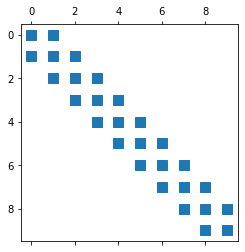

In [13]:
# Example_10
# visualizing sparse matrix using matplotlib

fig, ax = plt.subplots()
ax.spy(A)

Creating a sparse matrix for a tensor product between A and the matrix

$$B =  \begin{bmatrix}0 & 1 & 0 \\1 & 0& 1 \\0 & 1 & 0 \\\end{bmatrix}$$

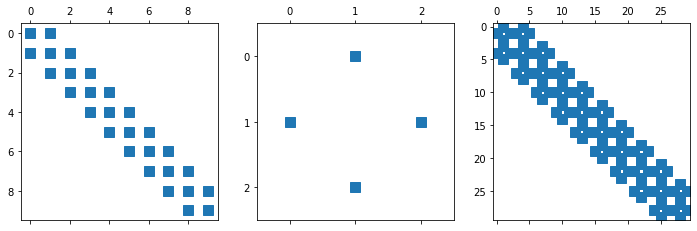

In [14]:
# Example_11

B = sp.diags([1, 1], [-1, 1], shape=[3, 3])
C = sp.kron(A, B)
fig, (ax_A, ax_B, ax_C) = plt.subplots(1, 3, figsize=(12, 4))
ax_A.spy(A)
ax_B.spy(B)
ax_C.spy(C)
